# Introduction

This data set includes customers who have paid off their loans, who have been past due and put into collection without paying back their loan and interests, and who have paid off only after they were put in collection. The financial product is a bullet loan that customers should pay off all of their loan debt in just one time by the end of the term, instead of an installment schedule. Of course, they could pay off earlier than their pay schedule.

This dataset is about past loans. The Loan payments data.csv data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

|  Field   | Description  |
|  ----  | ----  |
| Loan_id | A unique loan number assigned to each applicant |
| Loan_status  | Whether a loan is paid off or in collection |
| Principal   | The basic principal loan amount at origination |
| Terms | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date  | When the loan got originated and took effects |
| Due_date  | Since it’s one-time payoff schedule, each loan has one single due date |
| Paid_off_time  | The actual time a customer pays off the loan |
| Past_due_days  | How many days a loan has been past due |
| Age  | Age of applicant |
| Education  | Education of applicant |
| Gender  | The gender of applicant |

# Data Description

## import library

In [1]:
import numpy as np 
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

import seaborn as sns
plt.style.use('seaborn-pastel') # change the color of plot
# from plotly.offline import init_notebook_mode,iplot
# init_notebook_mode(connected=True)
# import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

## data set overview

In [2]:
# read csv file
data = pd.read_csv('Loan payments data.csv')
data.shape
# the data set has 500 samples and 10 features 

(500, 11)

In [3]:
# first five rows in dataset
data.head()

,Loan_ID,Loan_status,Principal,Terms,Effective_date,Due_date,Paid_off_time,Past_due_days,Age,Education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,0,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,0,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,0,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,0,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,0,28,college,female


In [4]:
# tells the data type of each column
data.info()
# 'Principal' 'Terms' 'Past_due_days' 'Age' are qualitative data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Loan_ID         500 non-null    object
 1   Loan_status     500 non-null    object
 2   Principal       500 non-null    int64 
 3   Terms           500 non-null    int64 
 4   Effective_date  500 non-null    object
 5   Due_date        500 non-null    object
 6   Paid_off_time   400 non-null    object
 7   Past_due_days   500 non-null    int64 
 8   Age             500 non-null    int64 
 9   Education       500 non-null    object
 10  Gender          500 non-null    object
dtypes: int64(4), object(7)
memory usage: 43.1+ KB


In [5]:
# check the empty values in data sets
data.isnull().sum()
# Paid_off_time and Past_due_days are not needed for our analysis.
# No null values in important columns. No processing is needed for null values. 

Loan_ID             0
Loan_status         0
Principal           0
Terms               0
Effective_date      0
Due_date            0
Paid_off_time     100
Past_due_days       0
Age                 0
Education           0
Gender              0
dtype: int64

In [6]:
# Convert 'due_date', 'effective_date' to date time object
data['Due_date'] = pd.to_datetime(data['Due_date'])
data['Due_date'].dtype

dtype('<M8[ns]')

In [7]:
data['Effective_date'] = pd.to_datetime(data['Effective_date'])
data['Effective_date'].dtype

dtype('<M8[ns]')

# Numerical Measures

In [8]:
# describe() gives the count, mean, std, min, max, important quantiles of the numeric columns
data.describe()

,Principal,Terms,Past_due_days,Age
count,500.000000,500.000000,500.000000,500.000000
mean,943.200000,22.824000,14.404000,31.116000
std,115.240274,8.000064,25.614312,6.084784
min,300.000000,7.000000,0.000000,18.000000
25%,1000.000000,15.000000,0.000000,27.000000
50%,1000.000000,30.000000,0.000000,30.000000
75%,1000.000000,30.000000,12.000000,35.000000
max,1000.000000,30.000000,76.000000,51.000000


In [9]:
# measure of location
# mean
mean_days = data['Past_due_days'].mean()
print('The mean of the Past_due_days is '+str(mean_days)+'.')

# median
median_days = data['Past_due_days'].median()
print('The median of the Past_due_days is '+str(median_days)+'.')
# calculation of the mode is similar with mean and median

# geometric mean
gmean_age = stats.gmean(data['Age'])
# round to 0 decimal places
print(f'The geometric mean of the Age is {gmean_age:.0f}.')

# trimmed mean with cutting off both 10% tails of the distribution
tmean_age = stats.trim_mean(data['Age'],0.1)
print(f'The calculated trimmed mean of the Age is {tmean_age:.2f}.')

# weighted mean
weights = [1, 1, 2, 2, 3]
wmean_principal = np.average(data['Principal'][100:105], weights = weights)
print(f'The weighted mean of the first 5 rows of the Principal is {wmean_principal:.2f}.')

The mean of the Past_due_days is 14.404.
The median of the Past_due_days is 0.0.
The geometric mean of the Age is 31.
The calculated trimmed mean of the Age is 30.66.
The weighted mean of the first 5 rows of the Principal is 977.78.


In [10]:
# 60th percentile
per_age = data['Age'].quantile(q = 0.6)
print(f'The 60th percentile of the age is {per_age:.0f}.')

# calculation of Q3
q3_age = data['Age'].quantile(q = 0.75)
print(f'Q3 of the column "age" is {q3_age:.0f}.')

The 60th percentile of the age is 32.
Q3 of the column "age" is 35.


In [11]:
# measure of variability
# variance and standard deviation
var_days = data['Past_due_days'].var()
std_days = data['Past_due_days'].std()
print(f'The variance and the standard deviation of the Past_due_days is {var_days:.2f} and {std_days:.2f} respectively.')

#coefficient of variation
cv_days = stats.variation(data['Past_due_days'])
print(f'The coefficient of variation of the Past_due_days is {cv_days:.2f}.')


The variance and the standard deviation of the Past_due_days is 656.09 and 25.61 respectively.
The coefficient of variation of the Past_due_days is 1.78.


In [12]:
# skewness
skew_days = stats.skew(data['Past_due_days'])
print(f'The skewness of the Past_due_days is {skew_days:.2f}.\n')

# z-score
zscore_principal = stats.zscore(data['Principal'])
# print the ID for the outliers of the principal
print(data['Loan_ID'][(zscore_principal > 3) | (zscore_principal < -3)]) 

The skewness of the Past_due_days is 1.46.

5      xqd20160706
10     xqd20160011
68     xqd20160069
147    xqd20160148
152    xqd20160153
181    xqd20160182
208    xqd20160209
253    xqd20160254
429    xqd20160430
Name: Loan_ID, dtype: object


In [13]:
# covariance and correlation
print('The covariance matrix is: \n')
print(data.iloc[300:, [2, 7, 8]].cov())
print('\nThe correlation matrix is: \n')
print(data.iloc[300:, [2, 7, 8]].corr())

The covariance matrix is: 

                 Principal  Past_due_days        Age
Principal      7708.291457    -240.256281 -92.575377
Past_due_days  -240.256281     863.236080  -9.753518
Age             -92.575377      -9.753518  38.004397

The correlation matrix is: 

               Principal  Past_due_days       Age
Principal       1.000000      -0.093139 -0.171041
Past_due_days  -0.093139       1.000000 -0.053849
Age            -0.171041      -0.053849  1.000000


In [14]:
p_value = stats.pearsonr(data.iloc[300:, 2], data.iloc[300:, 8])[1]
print(f'The p-value for the correlation coefficient between the Principal and the Age is: {p_value:.3f}.')

The p-value for the correlation coefficient between the Principal and the Age is: 0.015.


## Categorical Data Description

In [15]:
# check the categories within the data sets
data['Loan_status'].unique()

array(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'], dtype=object)

In [16]:
data['Education'].unique()

array(['High School or Below', 'Bechalor', 'college', 'Master or Above'],
      dtype=object)

In [17]:
data['Gender'].unique()

array(['male', 'female'], dtype=object)

In [18]:
# shows the frequency distribution of 'Pricipal State'
print('Pricipal State\n')
print('Data Principal value counts\n')
print(data.Principal.value_counts()) 

Pricipal State

Data Principal value counts

1000    377
800     111
300       6
500       3
900       2
700       1
Name: Principal, dtype: int64


In [19]:
# another way to show the frequency distribution of other categorical data
from collections import Counter
Counter(data['Loan_status']) # 300 people have paid off the loan on time while 100 have gone into collection

Counter({'PAIDOFF': 300, 'COLLECTION': 100, 'COLLECTION_PAIDOFF': 100})

In [20]:
Counter(data['Education']) 
# 209 people are High School or Below
# 67 people completed Bechalor 
# 220 people completed college
# 4 people completed Master or Above

Counter({'High School or Below': 209,
         'Bechalor': 67,
         'college': 220,
         'Master or Above': 4})

In [21]:
Counter(data['Gender']) # In our data, there are 423 male & 77 females. 

Counter({'male': 423, 'female': 77})

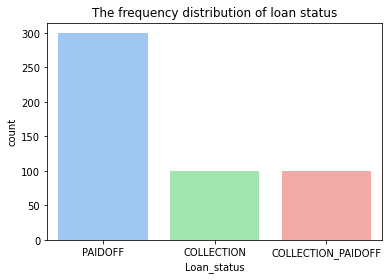

In [22]:
#Visualization process of Loan_Status--bar chart
sns.countplot(data['Loan_status'])
plt.title('The frequency distribution of loan status')
plt.show()

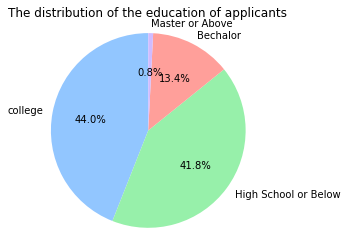

In [24]:
#Visualization process of Education--pie chart
education_counts = data['Education'].value_counts()
plt.pie(education_counts, labels = education_counts.index, 
        startangle = 90, autopct='%1.1f%%',
        counterclock = True);
plt.title('The distribution of the education of applicants')
plt.axis('square')
plt.show()

## Quantitive Data Description

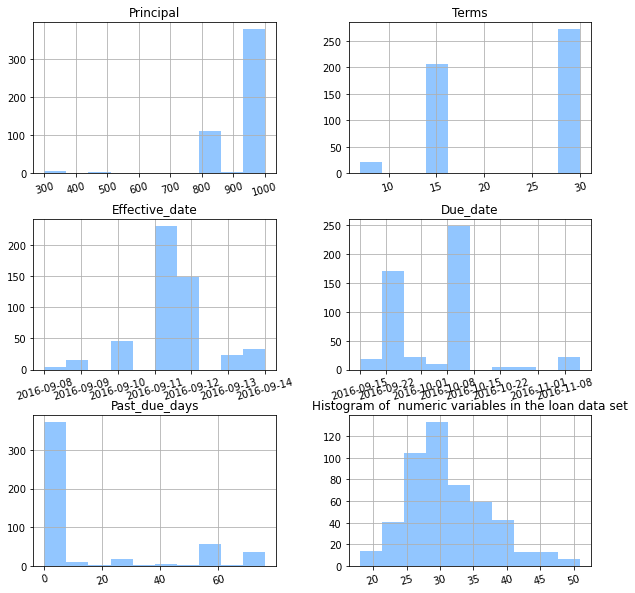

In [25]:
data.hist(bins=10, figsize=(10,10),xrot=15)
plt.title('Histogram of  numeric variables in the loan data set')
plt.show()

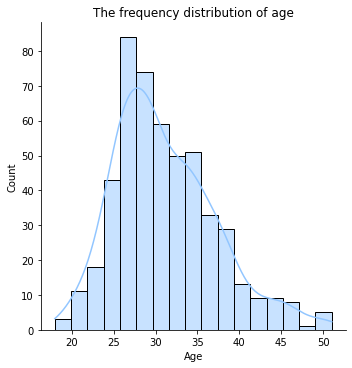

In [26]:
# shows the frequency distribution of age
sns.displot(data['Age'], kde=True)
plt.title('The frequency distribution of age')
plt.show()

In [28]:
# shows the frequency distribution of age after grouping
data['Age_range'] = pd.cut(data['Age'],[10,20,30,40,50,60],labels=['10s','20s','30s','40s','50s'])
print('Age Distribution\n')
print('Data Age_range value counts\n')
print(data.Age_range.value_counts()) 

Age Distribution

Data Age_range value counts

20s    263
30s    193
40s     36
10s      7
50s      1
Name: Age_range, dtype: int64


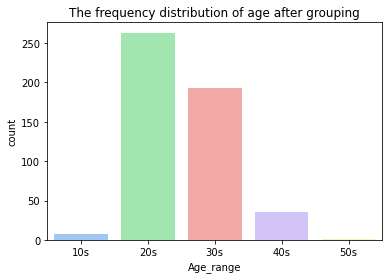

In [29]:
# shows the frequency distribution of age after grouping
sns.countplot(data['Age_range'])
plt.title('The frequency distribution of age after grouping')
plt.show()

## Two Variables Analysis

In [30]:
# Crosstabulation of gender and loan_status
data[['Loan_status', 'Gender', 'Loan_ID']].groupby(['Loan_status', 'Gender']).agg(['count'])

Loan_ID
                            count
Loan_status        Gender        
COLLECTION         female      10
                   male        90
COLLECTION_PAIDOFF female      14
                   male        86
PAIDOFF            female      53
                   male       247

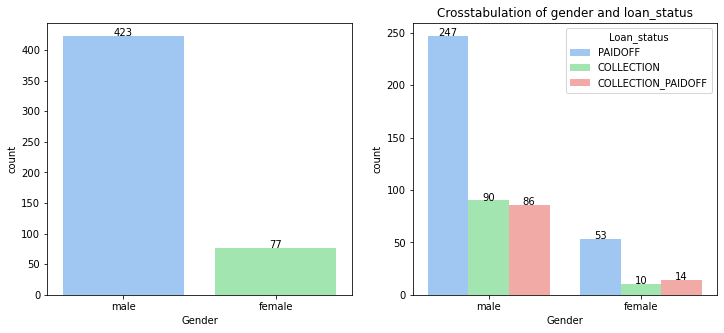

In [32]:
# Visualization of crosstabulation of gender and loan_status by using side-by-side bar chart
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
sns.countplot(data['Gender'],ax=ax1)
sns.countplot(data['Gender'],hue=data['Loan_status'],ax=ax2)
for p in ax1.patches:   
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",fontsize=10)
for p in ax2.patches:   
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",fontsize=10)
plt.title('Crosstabulation of gender and loan_status')
plt.show()

Overall, it can be seen that the man had a lot of loans.

In [33]:
# Crosstabulation of education and loan_status
data[['Loan_status', 'Education', 'Loan_ID']].groupby(['Loan_status', 'Education']).agg(['count'])

Loan_ID
                                          count
Loan_status        Education                   
COLLECTION         Bechalor                  11
                   High School or Below      49
                   Master or Above            1
                   college                   39
COLLECTION_PAIDOFF Bechalor                  15
                   High School or Below      37
                   college                   48
PAIDOFF            Bechalor                  41
                   High School or Below     123
                   Master or Above            3
                   college                  133

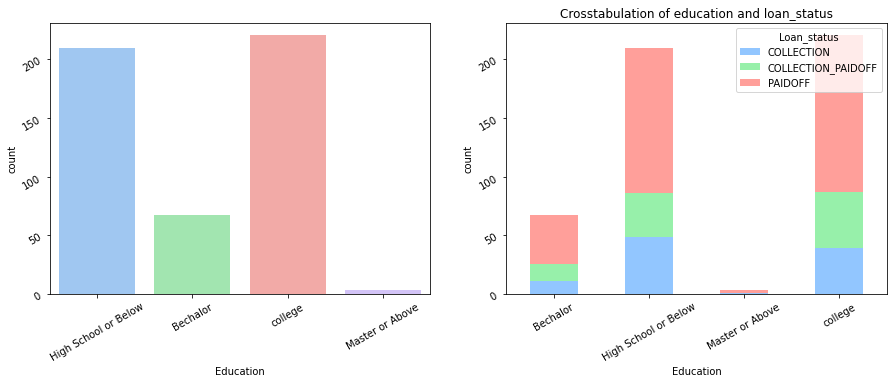

In [34]:
# Visualization of crosstabulation of education and loan_status by using stacked bar chart
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data['Education'],ax=ax1)
subdata = pd.crosstab(data.Education, data.Loan_status)
subdata.plot(kind='bar', stacked=True, ax=ax2)
ax1.tick_params(labelrotation=30)
ax2.tick_params(labelrotation=30)
plt.xlabel(u"Education")
plt.ylabel(u"count")
plt.title('Crosstabulation of education and loan_status')
plt.show()